## Load Stuff

In [1]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

In [2]:
print(torch.backends.mps.is_available())

True


In [3]:
BASE = "distilgpt2"

In [4]:
from transformers import AutoConfig, AutoModelWithLMHead

In [48]:
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)
#mario_lm = MarioLM()

Using distilgpt2 lm


Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.0.ln_cross_attn.weight', 'transformer.h.0.ln_cross_attn.bias', 'transformer.h.3.ln_cross_attn.weight', 'transformer.h.1.ln_cross_attn.bias', 'transformer.h.5.crossattention.c_attn.weight', 'transformer.h.2.ln_cross_attn.weight', 'transformer.h.1.crossattention.c_proj.weight', 'transformer.h.5.crossattention.q_attn.weight', 'transformer.h.3.ln_cross_attn.bias', 'transformer.h.2.crossattention.q_attn.bias', 'transformer.h.1.ln_cross_attn.weight', 'transformer.h.0.crossattention.c_proj.bias', 'transformer.h.4.ln_cross_attn.bias', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.2.crossattention.c_proj.bias', 'transformer.h.3.crossattention.q_attn.weight', 'transformer.h.2.crossattention.q_attn.weight', 'transformer.h.3.crossattention.c_attn.bias', 'transformer.h.5.crossattention.q_attn.bias', 'transformer.h.0.crossattention.c_attn.bias', 'tr

Using distilgpt2 tokenizer


In [22]:
mps_device = torch.device("mps")
mario_lm = mario_lm.to(mps_device)

### Load Dataset (Optional)

In [6]:
import os

prefix = '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/'
filepaths = os.listdir(prefix)
txt_paths = []
for p in filepaths:
    if p.endswith('.txt'):
        txt_paths.append(p)
full_paths = [os.path.join(prefix, x) for x in txt_paths]
print(full_paths)

['/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-1-3_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-8-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-7-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-2-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-5-3_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-6-2_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-6-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-3-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-5-1_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-6-3_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mario Bros/Paths/mario-3-3_Annotated_Path.txt', '/Users/james/playground/TheVGLC/Super Mar

In [49]:
dataset = MarioDataset(mario_lm.tokenizer, level_string=None)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





In [8]:
view_level(dataset.input_ids[500:1200], dataset.tokenizer)

['-------------oooooooo--E--xxxxxxx---------E-------',
 '-----------SSSSSSSSSSSSSSxx-SSSSxSSSSSSSSSSSSS----',
 '------------------------xx-------x----------------',
 '-----------------------xx---------x---------------',
 '----------xxxxxxxxxxxxxx-----------x------E------X',
 '---------xx--?SSSSSSSSSS--X?--------x-----QQ?QQQQX',
 '--------xx---------------XX----------x------------',
 '-------xx---------------XXX-----------xx----------',
 'xxxxxxxx-----------E---XXXX-----------X-xxxxxxxxxx',
 'XXXXXXXX---XXXXXXXXXXXXXXXXXXXX-------XXXXXXXXXXXX',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------']

/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


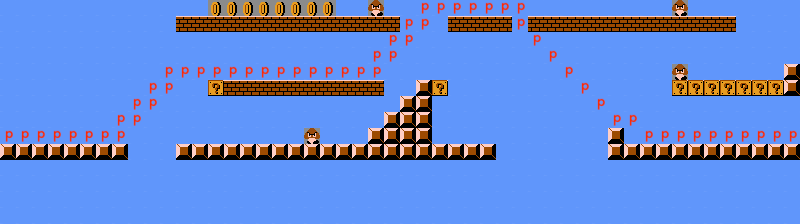

In [9]:
img = convert_level_to_png(dataset.input_ids[500:1200],  dataset.tokenizer)[0]
img

### Setup training

In [50]:
config = TrainingConfig(save_iteration=100, learning_rate=1e-5)

In [51]:
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)

In [ ]:
trainer.train(100000, batch_size=8)

Training for 100000 Iterations and batch_size 8
================== Training Config ==================
gradient_accumulation_steps -- 1
mixed_precision -- no
output_dir -- Mario-GPT2-700-context-length
learning_rate -- 1e-05
epsilon -- 1e-09
lr_warmup_steps -- 1000
batch_size -- 4
total_steps -- 50000
mask_proportion -- 0.0
eval_iteration -- 1000
save_iteration -- 100
================== MarioLM ==================
Follow tensorboard with: python -m tensorboard.main --logdir /Users/james/playground/mario-gpt/notebooks/Mario-GPT2-700-context-length


{'loss': 0.2720082700252533, 'last_lr': 9.586530612244899e-06}:   3%|███████▌                                                                                                                                                                                                                                                  | 3026/100000 [1:13:25<33:37:22,  1.25s/it]

In [14]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

mario_lm_cpu = mario_lm.to(torch.device('cpu'))
generated_level = mario_lm_cpu.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 51: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [03:34<00:00,  6.53it/s]

REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (10, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FED1810> (11, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x29FE


/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


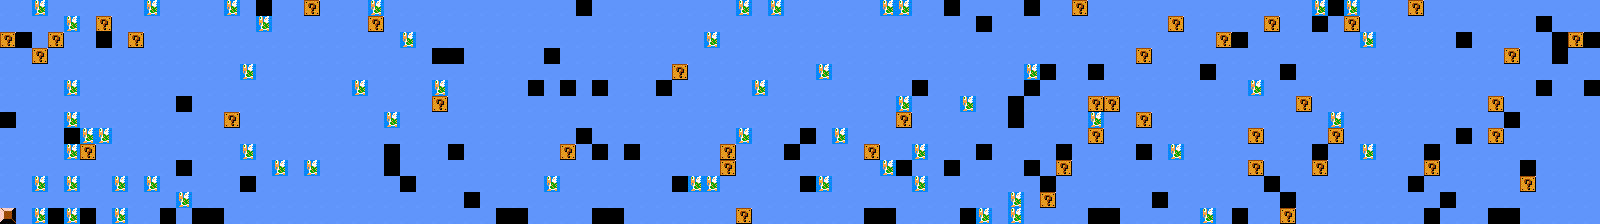

In [15]:
generated_level.img